# Impact of the scale on the linear regression model

## Preparation of data

### Import data

In [73]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import seaborn as sns
import matplotlib.pyplot as plt

In [74]:
df = pd.read_csv('loyer_paris.csv', sep=';')

In [75]:

df.head(5)

,annee,id_zone,id_quartier,nom_quartier,piece,epoque,meuble_txt,ref,max,min,ville,code_grand_quartier,geo_shape,geo_point_2d
0,2021,10,49,Salpêtrière,2,Avant 1946,non meublé,24.9,29.88,17.43,PARIS,7511349,"{""coordinates"": [[[2.3563634530819235, 48.8310...","48.83740588522814,2.3633186351497173"
1,2021,3,32,Europe,2,Avant 1946,meublé,28.7,34.44,20.09,PARIS,7510832,"{""coordinates"": [[[2.3122934012325604, 48.8733...","48.87814767585103,2.317174611304884"
2,2021,14,47,Bercy,3,1971-1990,non meublé,19.1,22.92,13.37,PARIS,7511247,"{""coordinates"": [[[2.3911410378394717, 48.8261...","48.8352090498651,2.3862100842120184"
3,2021,13,80,Charonne,4,Avant 1946,meublé,23.0,27.60,16.10,PARIS,7512080,"{""coordinates"": [[[2.4160210576126833, 48.8467...","48.85476028303528,2.4074303282359684"
4,2021,3,62,Muette,4,1971-1990,meublé,28.0,33.60,19.60,PARIS,7511662,"{""coordinates"": [[[2.245624861250342, 48.87635...","48.86327454383972,2.2599358317048384"


### Clean data

In [76]:
df = df[['ville', 'nom_quartier', 'min', 'max',"ref","piece","meuble_txt","epoque","annee"]]
df.head(5)

,ville,nom_quartier,min,max,ref,piece,meuble_txt,epoque,annee
0,PARIS,Salpêtrière,17.43,29.88,24.9,2,non meublé,Avant 1946,2021
1,PARIS,Europe,20.09,34.44,28.7,2,meublé,Avant 1946,2021
2,PARIS,Bercy,13.37,22.92,19.1,3,non meublé,1971-1990,2021
3,PARIS,Charonne,16.10,27.60,23.0,4,meublé,Avant 1946,2021
4,PARIS,Muette,19.60,33.60,28.0,4,meublé,1971-1990,2021


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12800 entries, 0 to 12799
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ville         12800 non-null  object 
 1   nom_quartier  12800 non-null  object 
 2   min           12800 non-null  float64
 3   max           12800 non-null  float64
 4   ref           12800 non-null  float64
 5   piece         12800 non-null  int64  
 6   meuble_txt    12800 non-null  object 
 7   epoque        12800 non-null  object 
 8   annee         12800 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 900.1+ KB


## Some visualisation

### Median of Price / Number of Piece

<Axes: xlabel='piece', ylabel='min'>

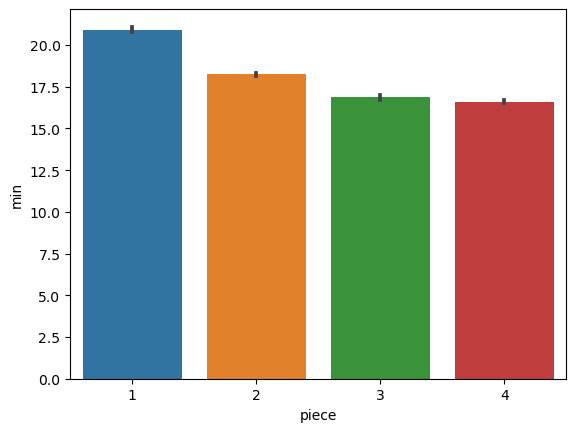

In [78]:
sns.barplot(x="piece", y="min", data=df, estimator=np.median)

## Create modele of Linear Regression

In [79]:
# Choix de caractéristiques
df_encoded = pd.get_dummies(df, columns=['nom_quartier', 'meuble_txt'])

features = ['piece', 'annee']
all_features = features + [col for col in df_encoded.columns if col not in df.columns]

X = df_encoded[all_features].values

y = df['ref'].values

### Split dataSet for LinearRegression

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

### Model without scaling

In [81]:
# Linear Regression without scaling
model_without_scaling = LinearRegression()
model_without_scaling.fit(X_train, y_train)

# Predictions and performance
predictions_without_scaling = model_without_scaling.predict(X_test)
mse_without_scaling = mean_squared_error(y_test, predictions_without_scaling)
r2_without_scaling = r2_score(y_test, predictions_without_scaling)


### Model with scaling

In [82]:
# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Linear Regression with scaling
model_with_scaling = LinearRegression()
model_with_scaling.fit(X_train_scaled, y_train)

# Predictions and performance
predictions_with_scaling = model_with_scaling.predict(X_test_scaled)
mse_with_scaling = mean_squared_error(y_test, predictions_with_scaling)
r2_with_scaling = r2_score(y_test, predictions_with_scaling)


## Visualizing results

### Results

In [83]:
print("Model without Scaling: MSE =", mse_without_scaling, "R2 =", r2_without_scaling)
print("Model with Scaling: MSE =", mse_with_scaling, "R2 =", r2_with_scaling)

Model without Scaling: MSE = 3.518118115708 R2 = 0.8056199229021865
Model with Scaling: MSE = 3.517248160915636 R2 = 0.8056679889062404


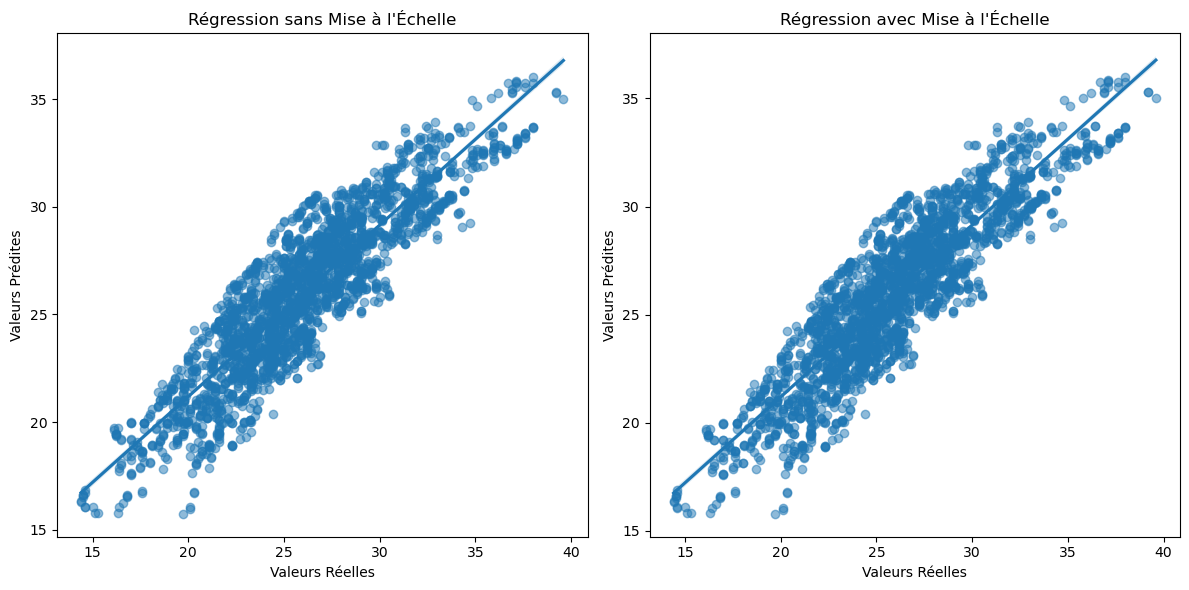

In [84]:


# Effectuer les prédictions avec les deux modèles
predictions_without_scaling = model_without_scaling.predict(X_test)
predictions_with_scaling = model_with_scaling.predict(X_test_scaled)

# Créer un graphique pour la comparaison
plt.figure(figsize=(12, 6))

# Tracer la courbe de régression pour le modèle sans mise à l'échelle
plt.subplot(1, 2, 1)
sns.regplot(x=y_test, y=predictions_without_scaling, scatter_kws={'alpha':0.5})
plt.title('Régression sans Mise à l\'Échelle')
plt.xlabel('Valeurs Réelles')
plt.ylabel('Valeurs Prédites')

# Tracer la courbe de régression pour le modèle avec mise à l'échelle
plt.subplot(1, 2, 2)
sns.regplot(x=y_test, y=predictions_with_scaling, scatter_kws={'alpha':0.5})
plt.title('Régression avec Mise à l\'Échelle')
plt.xlabel('Valeurs Réelles')
plt.ylabel('Valeurs Prédites')

plt.tight_layout()
plt.show()
